### Data Dictionary

- **title**: The title of the property listing.
- **price**: Price of the property in MAD (Moroccan Dirhams).
- **city**: The city where the property is located.
- **datetime**: A timestamp of when the property was posted.
- **nb_rooms**: Number of rooms in the property.
- **nb_baths**: Number of bathrooms in the property.
- **surface_area**: Surface area of the property in square meters.
- **equipement**: Extra information about the property, such as elevator, balcony, parking, etc.
- **link**: URL to the property listing.


In [1]:
pip install pandas sklearn 'imbalanced-learn'



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import config as conf 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler



In [3]:
# Let's load the dataset and start the exploration.

df = pd.read_csv('avito_data.csv',index_col=None)

df.head(3)

,Unnamed: 0,title,price,city,datetime,nb_rooms,nb_baths,surface_area,equipement,link
0,0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1 600 000 DH,Casablanca,"11/6/2024, 12:12:49 PM",3.0,1,132,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...
1,1,Appartement à vendre 125 m² à Casablanca,9 900 DH,Casablanca,"11/6/2024, 12:12:26 PM",2.0,2,125,"Balcon, Climatisation, Cuisine Équipée, Parkin...",https://www.avito.ma/fr/autre_secteur/appartem...
2,2,CMN-MA-1787 - Appartement à vendre à Les Hôpitaux,2 300 000 DH,Casablanca,"11/6/2024, 12:10:48 PM",3.0,2,233,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/quartier_des_h%C3%B4pi...


In [4]:
df.shape

(1760, 10)

In [5]:
# printing a full summary of our data.
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1760 non-null   int64  
 1   title         1400 non-null   object 
 2   price         1400 non-null   object 
 3   city          1400 non-null   object 
 4   datetime      1394 non-null   object 
 5   nb_rooms      1193 non-null   float64
 6   nb_baths      1181 non-null   object 
 7   surface_area  990 non-null    object 
 8   equipement    868 non-null    object 
 9   link          1760 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 137.6+ KB


In [6]:
# Before starting the cleaning process let's normalize the column's naming.

df.rename(
    columns = {
        "equipement" : "extras"
        
    }
)



,Unnamed: 0,title,price,city,datetime,nb_rooms,nb_baths,surface_area,extras,link
0,0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1 600 000 DH,Casablanca,"11/6/2024, 12:12:49 PM",3.0,1,132,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...
1,1,Appartement à vendre 125 m² à Casablanca,9 900 DH,Casablanca,"11/6/2024, 12:12:26 PM",2.0,2,125,"Balcon, Climatisation, Cuisine Équipée, Parkin...",https://www.avito.ma/fr/autre_secteur/appartem...
2,2,CMN-MA-1787 - Appartement à vendre à Les Hôpitaux,2 300 000 DH,Casablanca,"11/6/2024, 12:10:48 PM",3.0,2,233,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/quartier_des_h%C3%B4pi...
3,3,Appartement à vendre 3 chambres Salon à Casa,PRIX NON SPÉCIFIÉ,Casablanca,"11/6/2024, 12:10:57 PM",NaN,NaN,NaN,NaN,https://www.avito.ma/fr/ain_sebaa/appartements...
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://immoneuf.avito.ma/fr/unite/l53?utm_sou...
...,...,...,...,...,...,...,...,...,...,...
1755,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://immoneuf.avito.ma/fr/unite/job?utm_sou...
1756,1756,CMN-AN-1524 - Appartement à vendre à Racine,3 300 000 DH,Casablanca,"9/17/2024, 10:44:45 AM",3.0,2,154,"Ascenseur, Parking",https://www.avito.ma/fr/racine/appartements/CM...
1757,1757,CMN-AC-1776 - Appartement à vendre à Californie,3 500 000 DH,Casablanca,"9/17/2024, 10:26:48 AM",3.0,2,170,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/californie/appartement...
1758,1758,Bel Appartement à vendre 117 m² à Casablanca,990 000 DH,Casablanca,"9/17/2024, 10:08:29 AM",2.0,2,117,"Ascenseur, Balcon, Parking, Sécurité",https://www.avito.ma/fr/ain_sebaa/appartements...


In [7]:
# Remove the first column (randomly generated while scraping)

df.drop('Unnamed: 0',axis = 1 ,inplace = True)


df.head(1)

,title,price,city,datetime,nb_rooms,nb_baths,surface_area,equipement,link
0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1 600 000 DH,Casablanca,"11/6/2024, 12:12:49 PM",3.0,1,132,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...


In [8]:
df.describe(include='all')

,title,price,city,datetime,nb_rooms,nb_baths,surface_area,equipement,link
count,1400,1400,1400,1394,1193.000000,1181,990,868,1760
unique,789,328,21,1392,NaN,12,203,260,1670
top,Appartement à vendre 50 m² à Casablanca,PRIX NON SPÉCIFIÉ,Casablanca,"10/4/2024, 12:22:09 PM",NaN,2,50,"Ascenseur, Balcon, Parking, Terrasse",https://immoneuf.avito.ma/fr/unite/opK?utm_sou...
freq,51,207,1336,2,NaN,560,34,73,5
mean,NaN,NaN,NaN,NaN,2.393965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.746826,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN


The describe method didn't give us what we expected, because of the default types assignement

In [9]:
# let's check how many missing values where are dealy with an where are they

df.isna().sum()


title           360
price           360
city            360
datetime        366
nb_rooms        567
nb_baths        579
surface_area    770
equipement      892
link              0
dtype: int64

df.shape

describe the df defect you had and why you chose this method

In [10]:
# Let's search for rows that are empty from index 0 to 8
null_values = df.iloc[:,:8].isnull().all(axis = 1)

df = df[~null_values]

del null_values 


In [11]:
# checking if the amputation went well
df.isnull().sum()

title             0
price             0
city              0
datetime          6
nb_rooms        207
nb_baths        219
surface_area    410
equipement      532
link              0
dtype: int64

As we can see, the 360 added missing values were do to a defeact in the scrapper.

let's start by formating the data and adjusting the data types accordingly

In [12]:
# The data is not correctly formated and types are all over the places.

# cleaning each field and adjusting its type

# Formatting and casting the price
df['price'] = df['price'].str.replace(r'\s+| DH', '', regex=True).str.replace('DH','') # for some reason this in the only one that works
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [13]:
df['surface_area'] = pd.to_numeric(df['surface_area'],errors = 'coerce')

df['surface_area'].info()

<class 'pandas.core.series.Series'>
Index: 1400 entries, 0 to 1758
Series name: surface_area
Non-Null Count  Dtype  
--------------  -----  
987 non-null    float64
dtypes: float64(1)
memory usage: 21.9 KB


In [14]:
# doing the same for number of baths and rooms
df['nb_baths'] = pd.to_numeric(df['nb_baths'],errors = 'coerce')
df['nb_rooms'] = pd.to_numeric(df['nb_rooms'],errors = 'coerce')

In [15]:
df[['nb_baths','nb_rooms']].info()


<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nb_baths  1179 non-null   float64
 1   nb_rooms  1193 non-null   float64
dtypes: float64(2)
memory usage: 32.8 KB


In [16]:
# df['time'].isnull().sum()
df['Datetime'] = pd.to_datetime(df['datetime'],format='%m/%d/%Y, %I:%M:%S %p', errors='coerce')
# droping the old column

df.drop('datetime',axis = 1, inplace=True)

In [17]:
# splitting the datetime column into date and time and converting to 24h system.
df['Time'] = df['Datetime'].dt.time
df['Date'] = df['Datetime'].dt.date

df.head()

,title,price,city,nb_rooms,nb_baths,surface_area,equipement,link,Datetime,Time,Date
0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1600000.0,Casablanca,3.0,1.0,132.0,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...,2024-11-06 12:12:49,12:12:49,2024-11-06
1,Appartement à vendre 125 m² à Casablanca,9900.0,Casablanca,2.0,2.0,125.0,"Balcon, Climatisation, Cuisine Équipée, Parkin...",https://www.avito.ma/fr/autre_secteur/appartem...,2024-11-06 12:12:26,12:12:26,2024-11-06
2,CMN-MA-1787 - Appartement à vendre à Les Hôpitaux,2300000.0,Casablanca,3.0,2.0,233.0,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/quartier_des_h%C3%B4pi...,2024-11-06 12:10:48,12:10:48,2024-11-06
3,Appartement à vendre 3 chambres Salon à Casa,NaN,Casablanca,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-11-06 12:10:57,12:10:57,2024-11-06
5,Appartement à vendre 202 m² à Casablanca,3000000.0,Casablanca,4.0,3.0,202.0,"Ascenseur, Balcon, Climatisation, Concierge, T...",https://www.avito.ma/fr/maarif/appartements/Ap...,2024-11-06 11:59:43,11:59:43,2024-11-06


In [18]:
# dropping old datetime column
df.drop(columns = {'Datetime'},axis = 1,inplace=True)


In [19]:
df.head()

,title,price,city,nb_rooms,nb_baths,surface_area,equipement,link,Time,Date
0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1600000.0,Casablanca,3.0,1.0,132.0,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...,12:12:49,2024-11-06
1,Appartement à vendre 125 m² à Casablanca,9900.0,Casablanca,2.0,2.0,125.0,"Balcon, Climatisation, Cuisine Équipée, Parkin...",https://www.avito.ma/fr/autre_secteur/appartem...,12:12:26,2024-11-06
2,CMN-MA-1787 - Appartement à vendre à Les Hôpitaux,2300000.0,Casablanca,3.0,2.0,233.0,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/quartier_des_h%C3%B4pi...,12:10:48,2024-11-06
3,Appartement à vendre 3 chambres Salon à Casa,NaN,Casablanca,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/ain_sebaa/appartements...,12:10:57,2024-11-06
5,Appartement à vendre 202 m² à Casablanca,3000000.0,Casablanca,4.0,3.0,202.0,"Ascenseur, Balcon, Climatisation, Concierge, T...",https://www.avito.ma/fr/maarif/appartements/Ap...,11:59:43,2024-11-06


In [20]:
# Redescribing the data after the transformation 

df.describe(include='all')

,title,price,city,nb_rooms,nb_baths,surface_area,equipement,link,Time,Date
count,1400,1.193000e+03,1400,1193.000000,1179.000000,987.000000,868,1400,1394,1394
unique,789,NaN,21,NaN,NaN,NaN,260,1400,1369,51
top,Appartement à vendre 50 m² à Casablanca,NaN,Casablanca,NaN,NaN,NaN,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...,12:22:09,2024-11-05
freq,51,NaN,1336,NaN,NaN,NaN,73,1,2,100
mean,NaN,2.014280e+06,NaN,2.393965,12.945717,107.141844,NaN,NaN,NaN,NaN
std,NaN,1.872560e+07,NaN,0.746826,378.582786,55.772849,NaN,NaN,NaN,NaN
min,NaN,3.500000e+01,NaN,1.000000,0.000000,11.000000,NaN,NaN,NaN,NaN
25%,NaN,5.600000e+05,NaN,2.000000,1.000000,66.500000,NaN,NaN,NaN,NaN
50%,NaN,1.050000e+06,NaN,2.000000,2.000000,96.000000,NaN,NaN,NaN,NaN
75%,NaN,1.720000e+06,NaN,3.000000,2.000000,131.000000,NaN,NaN,NaN,NaN


### La distribution des donnees :

In [21]:
# Missing values per column

df.isna().sum()

title             0
price           207
city              0
nb_rooms        207
nb_baths        221
surface_area    413
equipement      532
link              0
Time              6
Date              6
dtype: int64

In [22]:
# Lets calculate the skewness of the numerical values 

# summary of numerical data
describe_df = df[['price','nb_rooms','nb_baths','surface_area']].describe()

# calculating the skewedness for each one.
skewness = df[['price','nb_rooms','nb_baths','surface_area']].skew()


# Calculate the percentage of missing values for each column
NaN_percentage = df[['price', 'nb_rooms', 'nb_baths', 'surface_area']].isna().mean() * 100


# adding the skew to the full summary
describe_df.loc['skew'] = skewness
describe_df.loc['NaN%'] = NaN_percentage



# Display the updated summary including skewness
describe_df

,price,nb_rooms,nb_baths,surface_area
count,1.193000e+03,1193.000000,1179.000000,987.000000
mean,2.014280e+06,2.393965,12.945717,107.141844
std,1.872560e+07,0.746826,378.582786,55.772849
min,3.500000e+01,1.000000,0.000000,11.000000
25%,5.600000e+05,2.000000,1.000000,66.500000
50%,1.050000e+06,2.000000,2.000000,96.000000
75%,1.720000e+06,3.000000,2.000000,131.000000
max,6.279000e+08,7.000000,13000.000000,447.000000
skew,3.172060e+01,0.789384,34.327444,1.702550
NaN%,1.478571e+01,14.785714,15.785714,29.500000


### Price:
The `price` column has 1,193 entries. It shows a very high mean value of approximately 2,014,280, with a large standard deviation (around 18.7), indicating significant variability in house prices. The skewness is highly positive (31.72), which suggests a strong rightward skew with a few extremely high prices. The minimum price is 35, and the maximum is over 627 million, with a 14,7% missing values percentage

### Number of Rooms (`nb_rooms`):
There are 1,193 entries with a mean of about 2.39 rooms. The standard deviation is 0.75, indicating relatively low variability. The skewness is 0.79, which shows mild positive skew, meaning more properties have fewer rooms than the average. The number of rooms ranges from 1 to 7, with a 14,7 missing values rate.

### Number of Bathrooms (`nb_baths`):
This column has 1,179 entries. The mean is 12.95 bathrooms, but with a very high standard deviation of 378.58, indicating extreme variability, likely due to a few properties with a large number of bathrooms (up to 13,000). The skewness is extremely high at 34.33, highlighting a few outliers with large bathroom counts. This missing values percentage is 15.78%

### Surface Area:
The `surface_area` column has 987 entries, with an average area of 107.14 square meters and a standard deviation of 55.77, which indicates moderate variability in property size. The skewness of 1.70 suggests a rightward skew, with some larger properties contributing to the positive tail. The area ranges from 11 to 447 square meters. The missing values percentage is 30% which is the highest.

---

This summary highlights that while the number of rooms and surface area have relatively mild skewness and variability, `price` and `nb_baths` show significant outliers, with skewness suggesting the presence of high-value properties.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


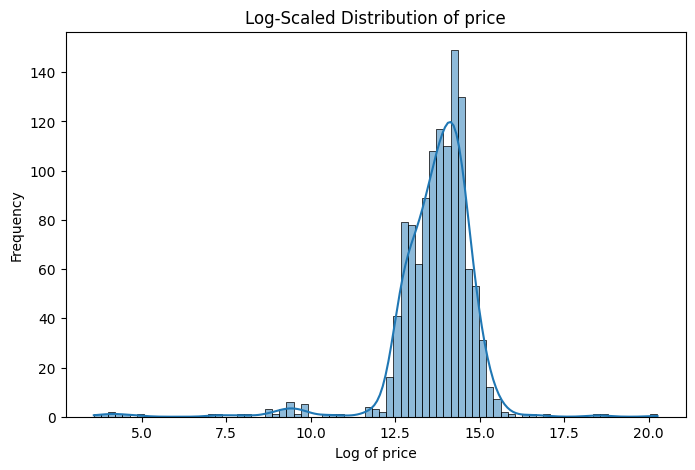

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


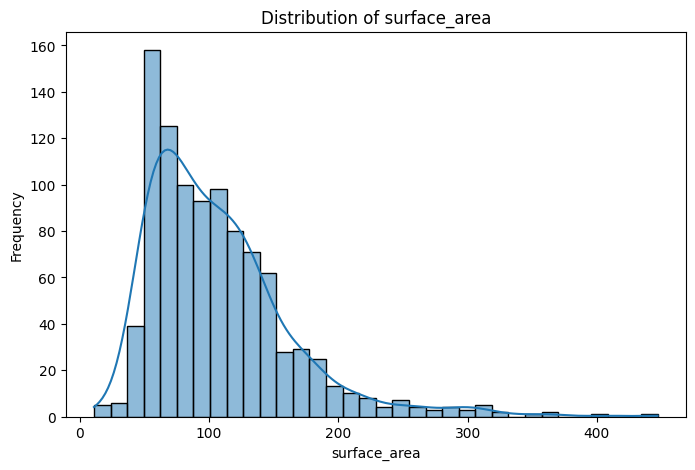

In [23]:
# List of columns to plot
cols = ['price', 'surface_area']

for col in cols:
    plt.figure(figsize=(8, 5))
    
    if col in ['price', 'nb_baths']:
        # For highly skewed columns, use a log transformation
        data = np.log1p(df[col])  # log(1 + x) to handle zero values
        sns.histplot(data, kde=True)
        plt.title(f'Log-Scaled Distribution of {col}')
        plt.xlabel(f'Log of {col}')
        plt.ylabel('Frequency')
    else:
        # For other columns, plot normally
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    # Show plot
    plt.show()

### Explanation of Adjustments:

**Log Transformation**:  
`np.log1p(df[col])` is applied to `price` and `nb_baths` due to their extreme skewness. The `log1p` function (log of 1 + x) allows us to handle any zero values gracefully.


### Impact of Outliers on Imputation

Outliers can significantly affect the distribution and relationships between features. If we impute missing values with outliers present, the imputation process might lead to inaccurate values.

For example, **KNN imputation** works by finding similar neighbors for a missing value. If outliers are present, they could distort the similarity calculation, leading to poor imputations.

In [24]:
# # This approad is drivin with more domain knowledge to preserve the meaning of the data.

# # Let's explore the column where the numbers don't make sense (nb_bathrooms)

# df[df['nb_baths'] > 4].shape # this was tested with multiple values and the return stabilized after > 4


# # so let's remove these 6 rows
# if (df['nb_baths'] > 4).any():
#     df = df[df['nb_baths'] <= 4]

In [25]:

# Let's check the percentage of missing values for each column
missing_price = df['price'].isnull().mean() * 100
missing_surface = df['surface_area'].isnull().mean() * 100
missing_baths = df['nb_baths'].isnull().mean() * 100
missing_rooms = df['nb_rooms'].isnull().mean() * 100

# logging the results
print(f"Missing data percentages:")
print(f"Price: {missing_price:.2f}%")
print(f"Surface Area: {missing_surface:.2f}%")
print(f"Number of Bathrooms: {missing_baths:.2f}%")
print(f"Number of Rooms: {missing_rooms:.2f}%")


# Fill missing values for relatively symmetric data using mean or mode
df['surface_area'] = df['surface_area'].fillna(df['surface_area'].mean())  # Filling with mean for surface_area
df['nb_rooms'] = df['nb_rooms'].fillna(df['nb_rooms'].mode()[0])  # Mode for nb_rooms

# Handling skewed data by filling with mode (or median if you prefer)
df['nb_baths'] = df['nb_baths'].fillna(df['nb_baths'].mode()[0])


Missing data percentages:
Price: 14.79%
Surface Area: 29.50%
Number of Bathrooms: 15.79%
Number of Rooms: 14.79%


In [26]:
df_KNN = df.copy()
# Columns used by KNN for calculating similarity
cols_for_knn = ['surface_area', 'nb_baths', 'nb_rooms',]

# Standardize the features before KNN
scaler = StandardScaler()

# Standardize the columns used for similarity
df_KNN[cols_for_knn] = scaler.fit_transform(df_KNN[cols_for_knn])

# Initialize the KNN imputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=3)

# Perform KNN imputation on 'price', using the other features for similarity
df_KNN['price'] = knn_imputer.fit_transform(df_KNN[cols_for_knn + ['price']])[:, -1]

# If needed, you can inverse transform the 'price' values back to the original scale
# In this case, the 'price' column should be imputed on the standardized data, but you may not need to inverse transform it if it's not the final output
# df_KNN['price'] = scaler.inverse_transform(df_KNN[['price']])

# Show the resulting DataFrame
print(df_KNN.head())

                                               title         price  \
0   CMN-MA-1641 - Appartement à vendre à Val Fleurie  1.600000e+06   
1           Appartement à vendre 125 m² à Casablanca  9.900000e+03   
2  CMN-MA-1787 - Appartement à vendre à Les Hôpitaux  2.300000e+06   
3       Appartement à vendre 3 chambres Salon à Casa  1.863333e+06   
5           Appartement à vendre 202 m² à Casablanca  3.000000e+06   

         city  nb_rooms  nb_baths  surface_area  \
0  Casablanca  0.944710 -0.029421  5.310943e-01   
1  Casablanca -0.477434 -0.026542  3.815394e-01   
2  Casablanca  0.944710 -0.026542  2.688958e+00   
3  Casablanca -0.477434 -0.026542 -6.072296e-16   
5  Casablanca  2.366855 -0.023662  2.026644e+00   

                                          equipement  \
0               Ascenseur, Balcon, Parking, Terrasse   
1  Balcon, Climatisation, Cuisine Équipée, Parkin...   
2               Ascenseur, Balcon, Parking, Terrasse   
3                                               

### Issue with KNN Imputation for `price`:

While attempting to fill the missing `price` values using KNN imputation, the `price` column was found to be consistently filled with values from the `surface_area` column, even after standardization of the features. This behavior indicates that the KNN imputation algorithm is unable to differentiate the relationship between `price` and `surface_area` properly, and it may be assigning the same values based on the similarity between rows.

#### Why This Happened:
1. **Correlation between Features**: In some cases, features like `surface_area` might have a strong correlation with `price`, leading to a situation where the imputation model fills in `price` with values similar to those in `surface_area`.
   
2. **KNN Sensitivity**: KNN imputation can sometimes overfit or not properly capture the unique relationships between columns, particularly when dealing with large discrepancies between feature scales or when the columns are highly correlated.

#### Solution:
To avoid this issue and ensure a more robust imputation for the `price` column, we will **fill the missing `price` values with the median** instead of using KNN. The median is a simple and effective method for handling missing values, particularly when the data distribution is skewed, as it is more robust to outliers than the mean.

In [27]:
# filling price using the median (highly skewed)

df['price'] = df['price'].fillna(df['price'].median())

df.isna().sum()

title             0
price             0
city              0
nb_rooms          0
nb_baths          0
surface_area      0
equipement      532
link              0
Time              6
Date              6
dtype: int64

#### Explanation:

1. **Equipement**: This column has a significant number of missing values (532). It might require more attention in terms of imputation or analysis, but for the moment it will not be needed for analysis.
   
2. **Time and Date**: These columns have a small number of missing values (6). Since these columns are related to timestamps, and 6 missing values out of a large dataset might not significantly affect the analysis, they can be left as-is for now.

### `nb_baths` Data Transformation

The `nb_baths` column contained some unrealistic values that did not make sense in the context of typical residential properties. Using domain knowledge, we identified and removed these extreme values to ensure that the data more accurately reflects real-world scenarios.

#### Transformation Details:
1. **Identifying Outliers**: 
   - We analyzed the column by checking values greater than 4 bathrooms, which were unrealistic in the context of residential properties. The number of rows with values exceeding 4 stabilized after this threshold, indicating that these values were outliers.
   
2. **Removal of Outliers**:
   - Using the condition `df['nb_baths'] > 4`, we identified and removed 6 rows from the dataset. These rows represented unrealistic property data with more than 4 bathrooms.

#### Resulting Data:
- The remaining rows in the `nb_baths` column now contain values between 0 and 4, which aligns with expected values for residential properties. This transformation improves the logical consistency of the dataset, making it more suitable for analysis.


In [28]:
# To handle outliers for 'price', 'surface_area' we'll use methods adpated to the data distribution.

# will use the IQR method due to its skewedness toleration (PRICE IS HIGHLY SKEWED)

Q1_PRICE = df['price'].quantile(0.25)
Q3_PRICE = df['price'].quantile(0.75)

IQR_PRICE = Q3_PRICE - Q1_PRICE

# Define the bounds for outliers in 'price'
lower_bound_price = Q1_PRICE - 1.5 * IQR_PRICE
upper_bound_price = Q3_PRICE + 1.5 * IQR_PRICE


# Filter out the outliers for both columns

price_outliers = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)] 
    

In [29]:
# the use of IQR (nb_baths highly skewed)

Q1_baths = df['nb_baths'].quantile(0.25)
Q3_baths = df['nb_baths'].quantile(0.75)

IQR_baths = Q3_baths - Q1_baths

# Define the bounds for outliers in 'price'
lower_bound_baths = Q1_baths - 1.5 * IQR_baths
upper_bound_baths = Q3_baths + 1.5 * IQR_baths


# Filter out the outliers for both columns
nb_baths_outliers = df[(df['nb_baths'] < lower_bound_baths) | (df['nb_baths'] > upper_bound_baths)] 


In [30]:
# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to 'surface_area' and 'nb_rooms'
df['surface_area_std'] = scaler.fit_transform(df[['surface_area']])
df['nb_rooms_std'] = scaler.fit_transform(df[['nb_rooms']])

In [31]:

mean_surface_area = df['surface_area_std'].mean()
std_surface_area = df['surface_area_std'].std()

# Calculate the Z-scores for each value in 'surface_area_std'
df['surface_area_score'] = (df['surface_area_std'] - mean_surface_area) / std_surface_area

# Display the first few rows with the Z-scores
df[['surface_area', 'surface_area_score']].head()

# Remove outliers with Z-scores above 3 or below -3
surface_area_outliers_zscore = df[(df['surface_area_score'] > 3) | (df['surface_area_score'] < -3)]


In [32]:

mean_rooms = df['nb_rooms_std'].mean()
std_rooms = df['nb_rooms_std'].std()

# Calculate the Z-scores for each value in 'surface_area'
df['nb_room_score'] = (df['nb_rooms_std'] - mean_rooms) / std_rooms

# Display the first few rows with the Z-scores
df[['nb_rooms', 'nb_room_score']].head()

# Remove outliers with Z-scores above 3 or below -3
nb_rooms_outliers_zscore = df[(df['nb_room_score'] > 3) | (df['nb_room_score'] < -3)]


# droping the std columns 

df.drop(columns = 'surface_area_score',inplace = True)
df.drop(columns = 'nb_room_score',inplace = True)

In [33]:
price_outliers.describe()

,price,nb_rooms,nb_baths,surface_area
count,8.000000e+01,80.000000,80.000000,80.000000
mean,1.484325e+07,3.250000,2.462500,204.089184
std,7.145464e+07,0.948016,0.654947,81.296565
min,3.000000e+06,1.000000,1.000000,67.000000
25%,3.200000e+06,3.000000,2.000000,140.750000
50%,3.650000e+06,3.000000,2.000000,195.500000
75%,4.650000e+06,4.000000,3.000000,260.250000
max,6.279000e+08,7.000000,4.000000,447.000000


In [34]:
nb_baths_outliers.describe()

,price,nb_rooms,nb_baths,surface_area
count,1.200000e+01,12.000000,12.000000,12.000000
mean,5.464083e+07,2.750000,1115.583333,200.154255
std,1.805424e+08,1.356801,3742.830564,108.407706
min,2.500000e+05,1.000000,4.000000,107.141844
25%,9.975000e+05,1.750000,4.000000,107.141844
50%,1.745000e+06,3.000000,20.000000,140.070922
75%,4.900000e+06,4.000000,70.000000,294.000000
max,6.279000e+08,5.000000,13000.000000,365.000000


In [35]:
surface_area_outliers_zscore.describe()

,price,nb_rooms,nb_baths,surface_area,surface_area_std,nb_rooms_std,surface_area_score
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.481853e+07,3.700000,2.733333,302.200000,4.167416,1.940211,4.165927
std,1.139105e+08,0.595963,0.784915,46.564305,0.994846,0.847546,0.994491
min,1.900000e+06,3.000000,1.000000,250.000000,3.052163,0.944710,3.051073
25%,3.212500e+06,3.000000,2.000000,266.500000,3.404686,0.944710,3.403470
50%,3.850000e+06,4.000000,3.000000,293.000000,3.970858,2.366855,3.969440
75%,4.800000e+06,4.000000,3.000000,312.250000,4.382134,2.366855,4.380569
max,6.279000e+08,5.000000,4.000000,447.000000,7.261067,3.788999,7.258473


In [36]:
nb_rooms_outliers_zscore.describe()

,price,nb_rooms,nb_baths,surface_area,surface_area_std,nb_rooms_std,surface_area_score,nb_room_score
count,9.000000e+00,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000
mean,1.273778e+07,5.555556,2.555556,176.380615,1.479286e+00,4.579080,1.478757e+00,4.577444
std,3.087631e+07,0.881917,0.881917,84.589474,1.807253e+00,1.254214,1.806608e+00,1.253766
min,6.400000e+05,5.000000,1.000000,107.141844,-6.072296e-16,3.788999,-3.053712e-17,3.787646
25%,1.300000e+06,5.000000,2.000000,107.141844,-6.072296e-16,3.788999,-3.053712e-17,3.787646
50%,3.000000e+06,5.000000,3.000000,150.000000,9.156642e-01,3.788999,9.153371e-01,3.787646
75%,3.300000e+06,6.000000,3.000000,186.000000,1.684804e+00,5.211144,1.684202e+00,5.209282
max,9.500000e+07,7.000000,4.000000,330.000000,4.761363e+00,6.633288,4.759662e+00,6.630919


The inspection of the outliers identified in the dataset will be further analyzed in the next commit. This will involve a deeper examination to determine whether the outliers represent genuine anomalies, errors, or rare but valid data points. Based on the findings, appropriate actions will be taken, such as removing, capping, or investigating these outliers separately to ensure the integrity and accuracy of the analysis.

In [37]:

# segmenting the house prices into high, medium and low price property

def categorize_price(price):
    if price > 1000000:
        return 'high'
    elif price < 500000:
        return 'low'
    else:
        return 'medium'

# Apply the function to create the new column
df['price_category'] = df['price'].apply(categorize_price)


In [38]:
# Check the distribution of the each segment
print(df['price_category'].value_counts())

price_category
high      811
medium    329
low       260
Name: count, dtype: int64


### Price Category Distribution

The `price_category` variable, which classifies properties based on their price, has the following distribution:

- **High**: 811 properties (Price > 1,000,000 MAD)
- **Medium**: 329 properties (Price between 500,000 and 1,000,000 MAD)
- **Low**: 260 properties (Price < 500,000 MAD)

This distribution indicates that the dataset is somewhat imbalanced, with a higher proportion of properties falling under the "high" category. This imbalance will be addressed in the next steps using techniques like SMOTE to balance the classes for modeling.


### Objective of Using SMOTE

The objective of applying SMOTE (Synthetic Minority Over-sampling Technique) in our dataset is to address the class imbalance in the `price_category` variable. Since the distribution of properties across the price categories is skewed, with a higher number of "high" priced properties, SMOTE will be used to generate synthetic samples for the underrepresented "medium" and "low" categories. This will ensure a more balanced dataset, improving the performance and fairness of machine learning models trained on this data.


In [39]:
# first lets fill the missing values of the equipement even tho it should be done more sofistically

df['equipement'] = df['equipement'].fillna(df['equipement'].mode()[0])

In [40]:
from sklearn.preprocessing import LabelEncoder

# formating and encoding data to fit the models requirements
df['equipement'] = df['equipement'].str.split(', ')
# Create a one-hot encoded column for each unique equipment feature
df = df.join(df['equipement'].str.join('|').str.get_dummies())

# label encoding the city 

label_encoder = LabelEncoder()

df['city_encoded'] = label_encoder.fit_transform(df['city'])

In [41]:
df.shape

(1400, 25)

In [42]:
ML_data = df.copy()

ML_data = ML_data[['price_category','price','city_encoded','nb_rooms','nb_baths','surface_area','Balcon','Chauffage','Climatisation','Concierge','Cuisine Équipée','Duplex','Meublé','Parking','Sécurité','Terrasse']]
ML_data['price_category'] = ML_data['price_category'].map({'high': 2, 'medium': 1, 'low': 0})
ML_data.head()

,price_category,price,city_encoded,nb_rooms,nb_baths,surface_area,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,2,1600000.0,4,3.0,1.0,132.000000,1,0,0,0,0,0,0,1,0,1
1,0,9900.0,4,2.0,2.0,125.000000,1,0,1,0,1,0,0,1,1,1
2,2,2300000.0,4,3.0,2.0,233.000000,1,0,0,0,0,0,0,1,0,1
3,2,1050000.0,4,2.0,2.0,107.141844,1,0,0,0,0,0,0,1,0,1
5,2,3000000.0,4,4.0,3.0,202.000000,1,0,1,1,0,0,0,0,0,1


In [44]:
from sklearn.model_selection import train_test_split

X = ML_data.drop(columns=['price', 'price_category'])  # Features (without target)
y = df['price_category']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [47]:
from collections import Counter

# Check the distribution of classes in the original y_train
print("Original y_train class distribution:", Counter(y_train))

# Check the distribution of classes in the resampled y_train_res
print("Resampled y_train_res class distribution:", Counter(y_train_res))

# Display the first few rows of X_train_res and y_train_res
print("\nFirst few rows of resampled X_train_res:")
print(X_train_res.head())

print("\nFirst few rows of resampled y_train_res:")
print(y_train_res.head())

Original y_train class distribution: Counter({'high': 662, 'medium': 264, 'low': 194})
Resampled y_train_res class distribution: Counter({'low': 662, 'high': 662, 'medium': 662})

First few rows of resampled X_train_res:
   city_encoded  nb_rooms  nb_baths  surface_area  Balcon  Chauffage  \
0             4       3.0       2.0     92.000000       1          0   
1             4       3.0       2.0    141.000000       1          0   
2             4       3.0       2.0    107.141844       1          0   
3             4       2.0       2.0    107.141844       1          0   
4             4       2.0       2.0    134.000000       1          0   

   Climatisation  Concierge  Cuisine Équipée  Duplex  Meublé  Parking  \
0              0          0                0       0       0        1   
1              0          0                0       0       0        0   
2              0          0                0       0       0        1   
3              0          0                0       0  

### Class Distribution Before and After Applying SMOTE

The distribution of classes in the target variable (`y_train`) was initially imbalanced. Here is the class distribution before and after applying SMOTE:

- **Original `y_train` Class Distribution**:
  - `high`: 662 instances
  - `medium`: 264 instances
  - `low`: 194 instances

- **Resampled `y_train_res` Class Distribution (After SMOTE)**:
  - `high`: 662 instances
  - `medium`: 662 instances
  - `low`: 662 instances

After applying SMOTE, the class distribution is balanced, with each class now having 662 instances. This resampling helps to prevent bias toward the majority class (`high`) during model training.
